# Geo chart

In [1]:
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어옵니다.
marathon_2015_2017 = pd.read_csv("../marathon_data/marathon_2015_2017.csv")

# matplotlib 를 불러옵니다.
import matplotlib.pyplot as plt

In [2]:
check_time = 7200  # 초로 2시간을 환산하면 7200
Lat = 0
Long = 0
# 위도('Lat'), 경도('Long')의 위치를 미리 지정
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

In [3]:
# 'Lat' : 위도, 'Long' : 경도
# column 명이 'Lat'과 'Long'인 DataFrame 을 생성합니다. 
marathon_location = pd.DataFrame(columns=['Lat','Long'])

# DataFrame에 iterrows 함수를 사용하면 DataFrame에 반복적으로 접근하여 row(행)를 한줄씩 읽어옵니다.
for index, record in marathon_2015_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:
        Lat = points[0][0]
        Long = points[0][1]
    # DataFrame에 append 함수를 사용하여 두개의 DataFrame 을 병합합니다.
    # marathon_location 에 dictinary 를 추가하여 병합합니다.
    marathon_location = marathon_location.append({'Lat' : Lat,
                                        'Long' : Long},
                                        ignore_index=True)

In [4]:
# marathon_location DataFrame을 확인합니다.
marathon_location

,Lat,Long
0,42.352089,-71.124947
1,42.352089,-71.124947
2,42.352089,-71.124947
3,42.352089,-71.124947
4,42.352089,-71.124947
...,...,...
79633,42.274032,-71.423979
79634,42.282364,-71.364801
79635,42.297870,-71.284260
79636,42.274032,-71.423979


In [5]:
# 'Lat'(위도)와 'Long'(경도)로 그룹핑을하고 size 함수를 통해 그룹핑된 데이터의 원소의 개수를 구합니다.
# reset_index 함수를 통해 index 레벨에 있던 모든 column 들을 다시 column 레벨로 변경합니다. 
# 이때 column 명이 없었던 column는 'Count' 라 이름을 명시해 줍니다.
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

In [6]:
# marathon_count DataFrame을 확인합니다.
marathon_count

,Lat,Long,Count
0,42.274032,-71.423979,135
1,42.282364,-71.364801,12161
2,42.297870,-71.284260,40653
3,42.324830,-71.259660,23870
4,42.345680,-71.215169,2579
5,42.351510,-71.086980,76
6,42.352089,-71.124947,164


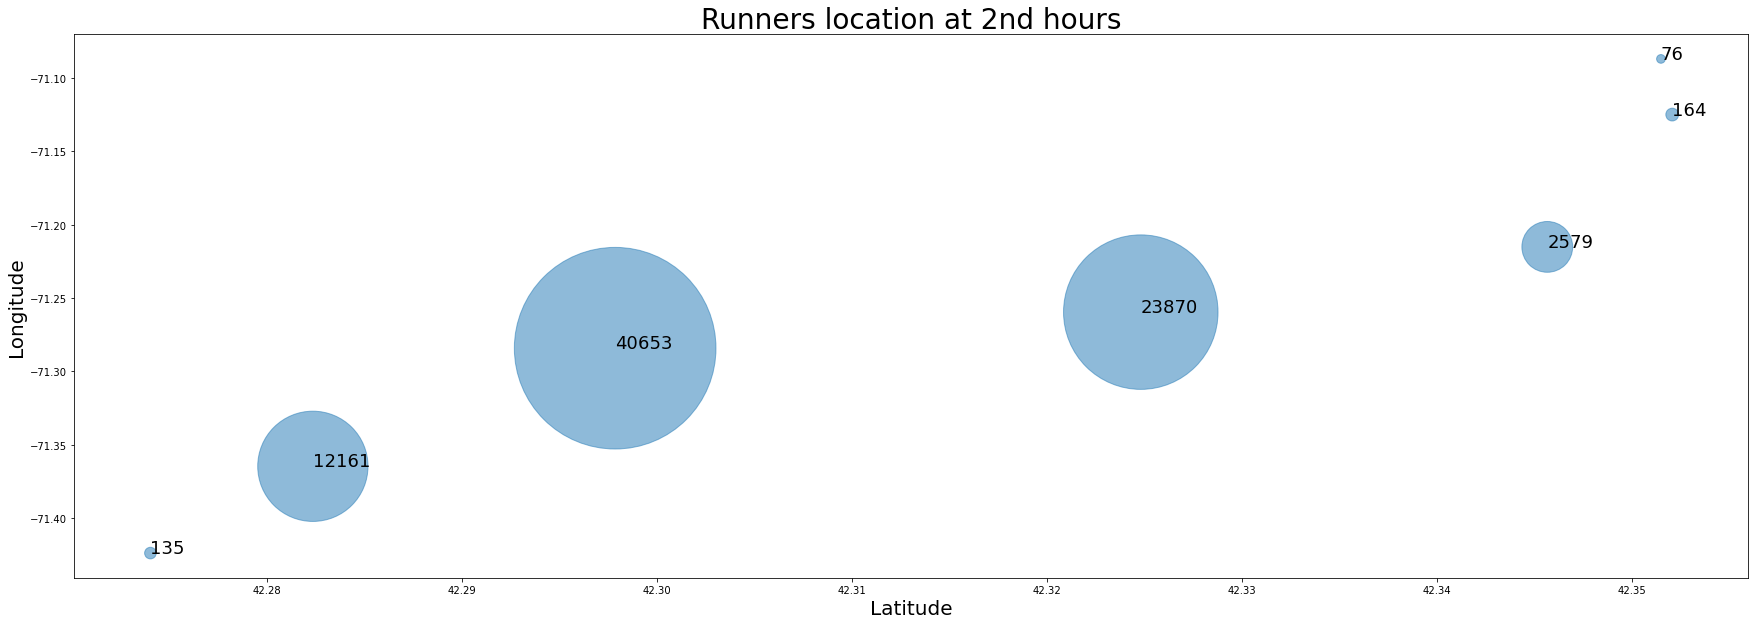

In [7]:
# 그림틀의 크기를 지정한다.
plt.figure(figsize=(30,10))

# x축, y축 데이터를 지정하여 scatter plot chart를 그립니다. 점의 크기를 정하는 s 파라미터에 변화를 주면 bubble chart 를 그릴 수 있다.
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

# 주석(annotations)을 적어줍니다.
for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

plt.title("Runners location at 2nd hours", fontsize=28)  # 차트 title 추가
plt.xlabel("Latitude", fontsize=20)   # x축 lable 추가(위도)
plt.ylabel("Longitude", fontsize=20)  # y축 lable 추가(경도)

# 그래프를 출력
plt.show()

In [10]:
# Geo Map을 사용하기 위해 folium 을 불러옵니다.
import folium
from folium.plugins import HeatMap

# folium marathon map을 생성합니다.
marathon_map = folium.Map(location=[42.324830,-71.259660],  # 25K 지점을 지도의 중심으로 두겠다 정의.
                       # tiles : 'OpenStreetMap', 'Mapbox Bright', 'Mapbox Conrol Room', 'Stamen', 'Cloudmade', 'Mapbox', 'CartoDB'
                       tiles = "OpenStreetMap",
                       zoom_start = 11)  # 초기 Zoom level 설정(int, default 10)

# heatmap 을 marathon_map에 추가
HeatMap(marathon_count, radius=20).add_to(marathon_map)

# 그래프를 출력
marathon_map